In [1]:
%%capture
import sys
!{sys.executable} -m pip install georinex pandas

In [1]:
import georinex as gr
import numpy as np

file = 'data/mccs3240.22o'

In [2]:
obs = gr.load(file, use='G', meas=['C1W', 'L1W', 'D1W', 'C2W', 'L2W', 'D2W'])

In [3]:
print(obs)

<xarray.Dataset>
Dimensions:  (sv: 31, time: 1919)
Coordinates:
  * sv       (sv) <U3 'G01' 'G02' 'G03' 'G04' 'G05' ... 'G29' 'G30' 'G31' 'G32'
  * time     (time) datetime64[ns] 2022-11-20T08:00:30 ... 2022-11-20T23:59:30
Data variables:
    C1W      (time, sv) float64 nan nan 2.135e+07 2.039e+07 ... nan nan nan
    C2W      (time, sv) float64 nan nan 2.135e+07 2.039e+07 ... nan nan nan
    D1W      (time, sv) float64 nan nan -2.344e+03 572.3 ... nan nan nan
    D2W      (time, sv) float64 nan nan -1.826e+03 445.9 ... nan nan nan
    L1W      (time, sv) float64 nan nan 1.122e+08 1.072e+08 ... nan nan nan
    L2W      (time, sv) float64 nan nan 8.741e+07 8.35e+07 ... nan nan nan
Attributes:
    version:                        3.03
    interval:                       30.0
    rinextype:                      obs
    fast_processing:                0
    time_system:                    GPS
    filename:                       mccs3240.22o
    position:                       [2830719.2743, 

In [4]:
hdr = gr.rinexheader(file)

In [5]:
sat = obs.sel(sv='G13').dropna(dim='time', how='all')

In [6]:
print(sat)

<xarray.Dataset>
Dimensions:  (time: 780)
Coordinates:
    sv       <U3 'G13'
  * time     (time) datetime64[ns] 2022-11-20T11:10:00 ... 2022-11-20T23:59:30
Data variables:
    C1W      (time) float64 2.487e+07 2.485e+07 2.482e+07 ... 2.35e+07 2.35e+07
    C2W      (time) float64 nan 2.485e+07 2.482e+07 ... 2.35e+07 2.35e+07
    D1W      (time) float64 3.661e+03 3.659e+03 3.658e+03 ... 594.7 574.2 553.6
    D2W      (time) float64 nan 2.851e+03 2.85e+03 ... 463.4 447.4 431.4
    L1W      (time) float64 1.307e+08 1.306e+08 ... 1.235e+08 1.235e+08
    L2W      (time) float64 nan 1.017e+08 1.017e+08 ... 9.623e+07 9.621e+07
Attributes:
    version:                        3.03
    interval:                       30.0
    rinextype:                      obs
    fast_processing:                0
    time_system:                    GPS
    filename:                       mccs3240.22o
    position:                       [2830719.2743, 2196543.8994, 5259189.0507]
    time_offset:                

In [7]:
df = sat.to_dataframe()

In [8]:
C1W, C2W = df['C1W'], df['C2W']
L1W, L2W = df['L1W'], df['L2W']
D1W, D2W = df['D1W'], df['D2W']

In [9]:
wavelengthL1 = 0.1905
wavelengthL2 = 0.2445

fL1 = 1575.42 * 1e6
fL2 = 1227.6 * 1e6

c = 299792458

L1W, L2W = L1W * (c / fL1), L2W * (c / fL2)

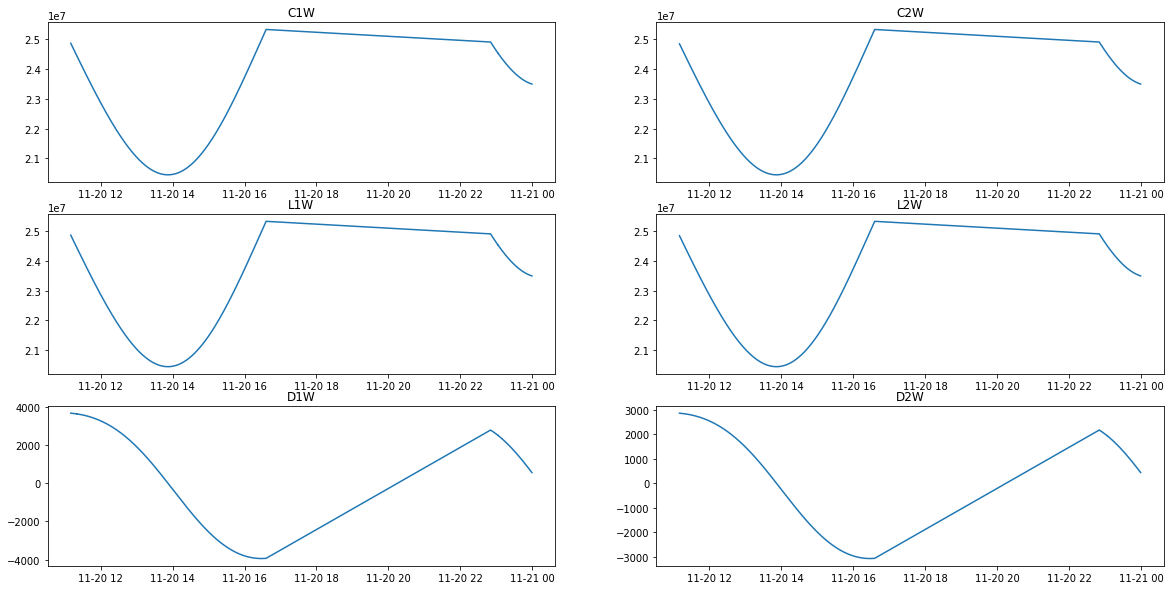

In [10]:
from matplotlib.pyplot import figure, show
import matplotlib.pyplot as plt
fig, ((c1w, c2w), (l1w, l2w), (d1w, d2w)) = plt.subplots(3, 2, figsize=(20, 10))

c1w.set_title('C1W')
c1w.plot(C1W)

c2w.set_title('C2W')
c2w.plot(C2W)

l1w.set_title('L1W')
l1w.plot(L1W)

l2w.set_title('L2W')
l2w.plot(L2W)

d1w.set_title('D1W')
d1w.plot(D1W)

d2w.set_title('D2W')
d2w.plot(D2W)
show()

# Ionosphere-free

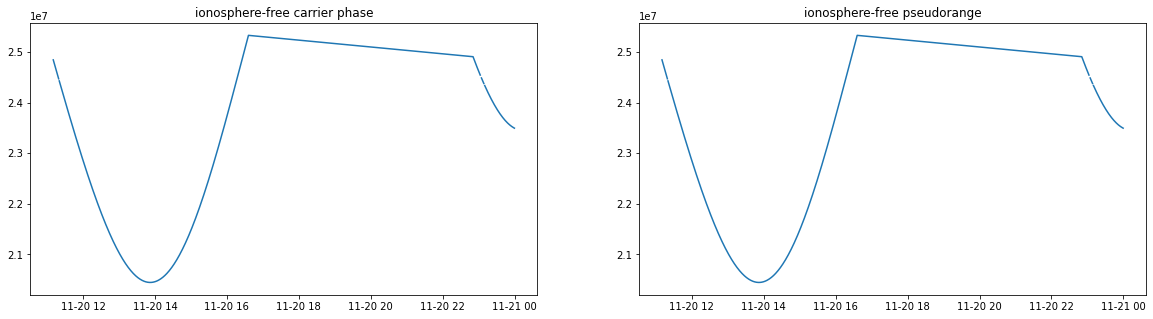

In [11]:
phiLC = (fL1**2 * L1W - fL2**2 * L2W) / (fL1**2 - fL2**2)
rPC = (fL1**2 * C1W - fL2**2 * C2W) / (fL1**2 - fL2**2)

fig, (plc, rpc) = plt.subplots(1, 2, figsize=(20, 5))

plc.set_title('ionosphere-free carrier phase')
plc.plot(phiLC)

rpc.set_title('ionosphere-free pseudorange')
rpc.plot(rPC)

# Geometry

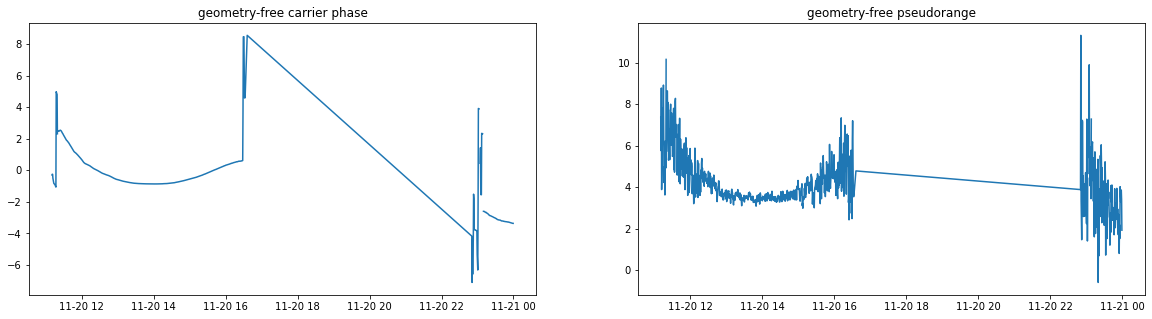

In [12]:
pLI = L1W - L2W
rPI = C2W - C1W

fig, (pli, rpi) = plt.subplots(1, 2, figsize=(20, 5))

pli.set_title('geometry-free carrier phase')
pli.plot(pLI)

rpi.set_title('geometry-free pseudorange')
rpi.plot(rPI)

# Wide-lanning

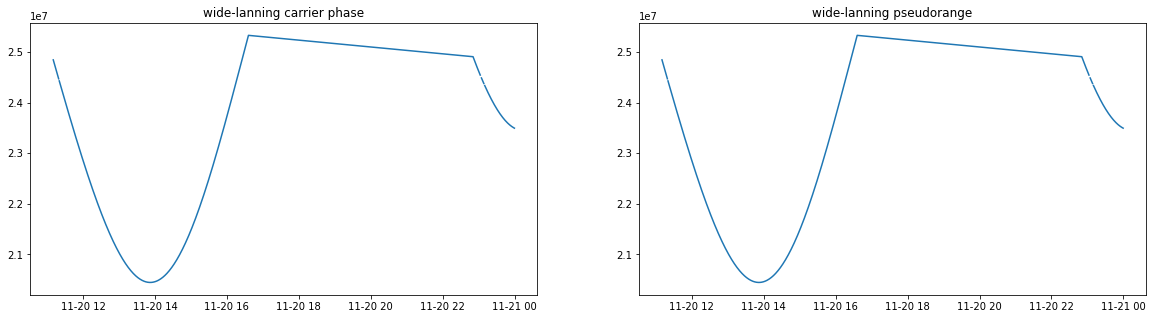

In [13]:
phiLW = (fL1 * L1W - fL2 * L2W) / (fL1 - fL2)
rPW = (fL1 * C1W - fL2 * C2W) / (fL1 - fL2)

fig, (plw, rpw) = plt.subplots(1, 2, figsize=(20, 5))

plw.set_title('wide-lanning carrier phase')
plw.plot(phiLW)

rpw.set_title('wide-lanning pseudorange')
rpw.plot(rPW)

# Narrow-lanning

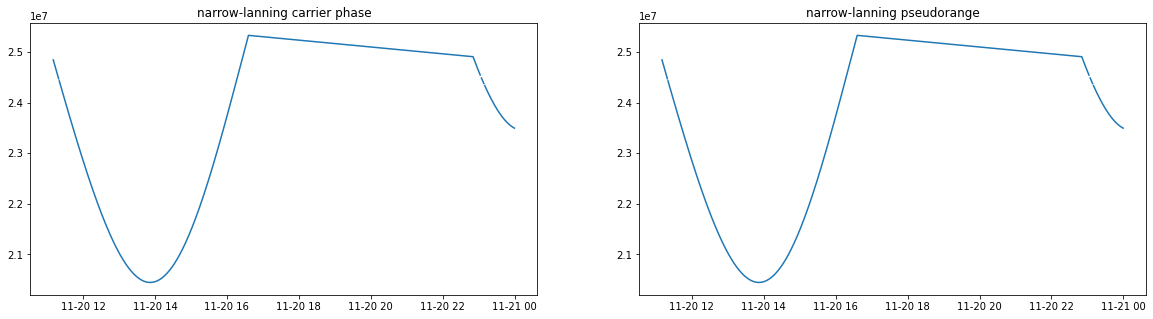

In [14]:
phiLN = (fL1 * L1W + fL2 * L2W) / (fL1 + fL2)
rPN = (fL1 * C1W + fL2 * C2W) / (fL1 + fL2)

fig, (pln, rpn) = plt.subplots(1, 2, figsize=(20, 5))

pln.set_title('narrow-lanning carrier phase')
pln.plot(phiLN)

rpn.set_title('narrow-lanning pseudorange')
rpn.plot(rPN)

# Melbourne-Wubbena

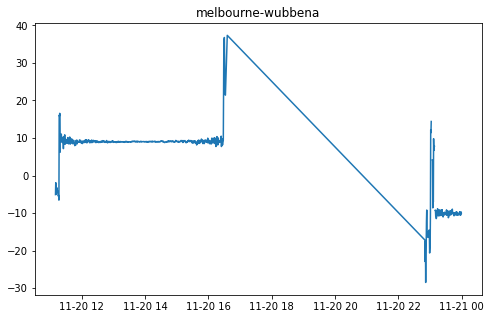

In [15]:
Bw = phiLW - rPN

fig, bw = plt.subplots(1, figsize=(8, 5))

bw.set_title('melbourne-wubbena')
bw.plot(Bw)